<a href="https://colab.research.google.com/github/thecrazyphysicist369/Voting-in-a-Small-World-Network/blob/master/Linear_Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


#vertex generator generates each voter with their properties
def gen_vertex(n):
    ver_list=[]
    c=0

    for i in range(n):
        vertex = {'index': c, 			#the unique index of the voter 
                  'endurance': random.randrange(-100, 100), #the enduaring power of the voter
                  'influence': random.randint(10, 50), #the influencing power of the voter
                  'connected': [], #the small world connections between the voters
                  }
        ver_list.append(vertex)
        c+=1
    return ver_list

def gen_graph(n, k, p):
   verlist = gen_vertex(n)
   #n = a + b
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
   	verlist[i]['connected']=neighbor[i]
   #print(conlist)
   return verlist

In [ ]:
def lin_campaining(voters):
    list_pos = [] #list for party A
    list_neg = [] #list for party B
    list_neu = [] #list for neutral Party
    pos = 0
    neg = 0
    neu = 0
    for influencer in voters:
        friends = influencer['connected']
        #print(friends)
        for j in friends:
            v_en=float(voters[j]['endurance'])
            in_en=float(influencer['endurance'])
            in_in=float(influencer['influence'])
	        
            if v_en>0 and in_en>0:
		    #if the voter and influencer belongs to the same party A
                voters[j]['endurance'] = v_en+(in_in*random.uniform(0, 0.2))
            elif v_en<0 and in_en<0:
	    	#if the voter and influencer belongs to the same party B
                voters[j]['endurance'] = v_en-(in_in*random.uniform(0, 0.2))
            elif v_en >0 and in_en<0:
	    	#if voter belongs to A and influencer in B
               	voters[j]['endurance'] = v_en-(in_in*random.uniform(5, 10))
            elif v_en<0 and in_en>0:
	    	#if voter belongs to B and influencer in A
               	voters[j]['endurance'] = v_en+(in_in*random.uniform(5, 10))
            elif v_en==0 and in_en>0:
                voters[j]['endurance'] = in_in
            elif v_en==0 and in_en<0:
                voters[j]['endurance'] = -1 * in_in
            
        #    print(j, voters[j]['endurance'])
        #print('\n')
        pos = 0
        neg = 0
        neu = 0
        for j in range(len(voters)):
            if float(voters[j]['endurance'])>0:
                pos += 1
            elif float(voters[j]['endurance'])<0:
                neg += 1
            else:
                neu += 1
        list_pos.append(pos)
        list_neg.append(neg)
        list_neu.append(neu)

    return (voters, list_pos,
            list_neg,
            list_neu)

Please input the number of voters you want to analyze : 500

Input the k nearest neighbors : 10
enter the probablity of the node connection : 0.5
please enter the number of iterations you want the campaining to run : 5
Doing Linear Voting


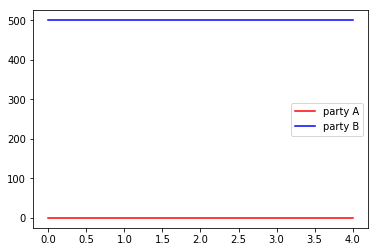

In [ ]:
number_of_voters = int(input("Please input the number of voters you want to analyze : "))

k = int(input("\nInput the k nearest neighbors : "))

p = float(input("enter the probablity of the node connection : "))

iterations = int(input("please enter the number of iterations you want the campaining to run : "))
number=[]
for i in range(number_of_voters):
    number.append(i)

#Generating the small world network
voters_p = gen_graph(number_of_voters, k, p)

posi = []
negi = [] 
neut = []
count = []

  #The voting takes place as many times the iteration is chosen
print ("Doing Linear Voting")

for j in range (iterations):
	voters_p,pos,neg,neu=lin_campaining(voters_p)
	posi.append(pos[number_of_voters-1]) #Keeps track of party A
	#print(pos[number_of_voters-1])
	negi.append(neg[number_of_voters-1]) #Keeps track of party B
	#print(neg[number_of_voters-1])
	neut.append(neu[number_of_voters-1]) #Keeps track of Neutral
	count.append(j)
	#print_each_iter(number,	pos, neg)
    


plt.plot(count, posi, color='r', label = "party A")
plt.plot(count, negi, color='b', label = "party B")
#plt.plot(count, neut, color='g', label = "Neutral")
plt.legend()
plt.show()

In [ ]:
#This is the slider visualization section
pop = widgets.IntSlider(value=5000, 
                      description='population size', 
                      max=100000, 
                      min=10000,
                      step=10000) #population_size
k = widgets.IntSlider(value=10, 
                      description='nearest neighbors', 
                      max=100, 
                      min=0,
                      step=5) #nearest neighbor
p = widgets.FloatSlider(value=0.5,
                        description='probability', 
                        max=1, 
                        min=0, 
                        step=0.1) #probability
iter = widgets.IntSlider(value=100, 
                               description='days', 
                               max=600, 
                               min=0, 
                               step=20)
tpm = widgets.IntSlider(value=1000,
                        description='test per million',
                        max=100000,
                        min=1000,
                        step=1000)
ex = widgets.IntSlider(value=50,
                       description='initial exposed',
                       max=500,
                       min=10,
                       step=10)


def simulation(pop,k,p,iter,tpm,ex):
    #Generating the small world network
    population = gen_graph(pop, k, p)

    #Exposing the population
    #li is the list of the first round of exposed population
    population,li = expose_population(ex, population)


    #Number of days the simulation need to run
    count = np.arange(iter)


    # List to contain the current data
    susp = []
    expo = []
    infe = []
    reco = []
    dead = []


    elapsed = 0
    # Running the days simulation for given number of days
    for j in range (iter):
      inter = []
      tic = time.time()
      population, sus, exp, inf, rec, ded = days(population, tpm)
      susp.append(len(sus)) #Count of suspected persons per day
      expo.append(len(exp)) #Count of exposed persons per day
      infe.append(len(inf)) #Count of infected persons per day
      reco.append(len(rec)) #Count of recovered persons per day
      dead.append(len(ded))
      toc = time.time()
      one_day = toc - tic
      elapsed += one_day
      estimated = elapsed*(iter-j)
      remaining = (iter * one_day) - (j * one_day)
      #print("Doing ",j,"th iteration. Time :","{:.2f}".format(one_day),
       #     "secs. Elapsed time :","{:.2f}".format(elapsed),"secs. Remaining : ","{:.2f}".format(remaining),"secs")
    #progress_bar(estimated,elapsed)
    
    plt.figure(figsize=(20,10))
    plt.plot(count, susp, color='b', label = "Susceptible")
    plt.plot(count, expo, color='y', label = "Exposed")
    plt.plot(count, infe, color='r', label = "Infected")
    plt.plot(count, reco, color='g', label = "Recovered")
    plt.plot(count, dead, color='k', label = "Dead")
    label = "Probability = "+str(p)+". Nearest Neigbours = "+str(k)+"."
    plt.title(label, fontdict=None, loc='center', pad=None)
    plt.legend()
    return()
ui = widgets.HBox([pop,k,p,iter,tpm,ex])
out = widgets.interactive_output(simulation, {'pop':pop,'k':k,'p':p,'iter':iter,'tpm':tpm,'ex':ex})

display(ui, out)